## Preparación de los datos ##

### Cargar datos ###

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
datos = pd.read_csv('/content/datos_tratados.csv')
datos.sample(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
957,1346-UFHAX,0.0,Female,0,0,0,13.0,1,1,Fiber optic,...,0,0,0,0,Month-to-month,1,Credit card (automatic),80.00,1029.35,2.666667
986,1389-CXMLU,1.0,Male,1,0,0,3.0,1,1,Fiber optic,...,1,0,1,0,Month-to-month,0,Electronic check,91.05,289.10,3.035000


### Eliminación de columnas irrevelantes ###

Voy a realizar una lista con account.Charges.Total,customer.tenure,Cuentas_Diarias a estas voyt a sacar la correalcion para ver cual puedo eliminar, ya que, con estas 3 tengo dudas todas la demas las dejaria


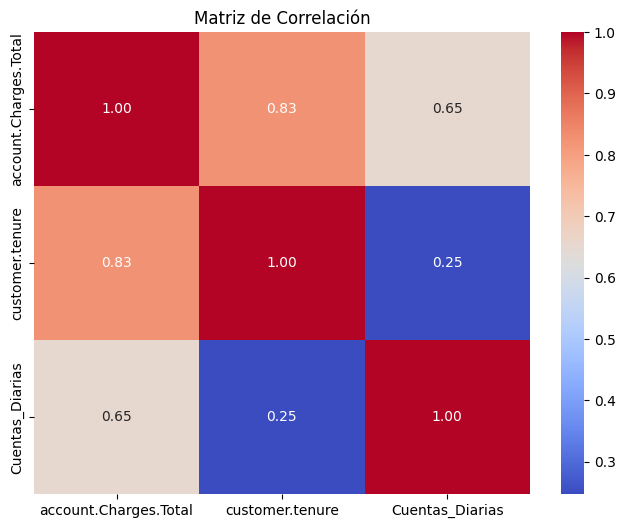

In [103]:
columas_analizar = datos[['account.Charges.Total', 'customer.tenure', 'Cuentas_Diarias']]
matriz_corr = columas_analizar.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

En este punto estoy mas o menos claro de que las variables a eliminar son account.Chargues.Total o customer.tenure, según lo leído tenure suele ser mas importante que charges total , ya que, account.Charges.Total se puede calcular multiplicando tenure y monthly chargues.

In [104]:
datos = datos.drop(columns=['customerID'])

In [105]:
datos.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
7172,0.0,Male,0,0,1,19.0,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Credit card (automatic),25.35,566.10,0.845000
6398,0.0,Male,0,0,0,44.0,1,1,Fiber optic,0,...,1,0,0,1,Month-to-month,1,Mailed check,90.40,4063.00,3.013333
792,1.0,Female,0,0,0,16.0,1,0,DSL,0,...,0,1,0,0,Month-to-month,1,Mailed check,53.90,834.15,1.796667
6063,0.0,Male,0,0,0,12.0,1,0,Fiber optic,0,...,1,0,1,1,One year,0,Electronic check,95.70,1184.00,3.190000
96,NaN,Male,0,0,0,29.0,1,0,DSL,1,...,0,1,0,0,One year,1,Electronic check,58.75,1696.20,1.958333


### Encoding ###

In [106]:
datos['customer.gender'] = datos['customer.gender'].map({'Female': 0, 'Male': 1})
columnas_categoricas = ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']

datos_codificados = pd.get_dummies(data=datos,columns=columnas_categoricas,dtype=int)

In [107]:
datos_codificados.sample(10)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
4107,0.0,0,1,0,0,49.0,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
3063,1.0,1,0,0,0,1.0,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6071,0.0,0,0,0,0,39.0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
6086,0.0,0,0,0,0,65.0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
5893,1.0,0,0,1,0,6.0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5517,0.0,0,0,0,0,13.0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
979,1.0,0,1,0,0,4.0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4299,0.0,1,1,1,0,34.0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3883,0.0,0,0,0,1,15.0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1447,0.0,1,1,1,0,7.0,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [108]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   float64
 1   customer.gender                                  7267 non-null   int64  
 2   customer.SeniorCitizen                           7267 non-null   int64  
 3   customer.Partner                                 7267 non-null   int64  
 4   customer.Dependents                              7267 non-null   int64  
 5   customer.tenure                                  7256 non-null   float64
 6   phone.PhoneService                               7267 non-null   int64  
 7   phone.MultipleLines                              7267 non-null   int64  
 8   internet.OnlineSecurity                          7267 non-null   int64  
 9   internet.OnlineBackup         

### Verificacion de la proporción de cancelación ###

In [109]:
proporcion_churn = datos_codificados['Churn'].value_counts(normalize=True)*100
print(proporcion_churn)

Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [110]:
proporcion_churn = datos_codificados['Churn'].value_counts()
print(proporcion_churn)

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


Podemos ver una gran diferencia entre los que cancelaron el servicio y no que aún siguen

### Balanceo de clases ###

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = datos_codificados.drop('Churn', axis=1)
y = datos_codificados['Churn']
df_final = pd.concat([X, y], axis=1).dropna()
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [112]:
#Oversampling

smote = SMOTE(random_state=42)
X_train_balanceo_smote, y_train_balanceo_smote = smote.fit_resample(X_train, y_train)

print("Conteo de clases después de SMOTE (oversampling):")
print(y_train_balanceo_smote.value_counts())

print("----------------------------------------------------------")
modelo_smote = DecisionTreeClassifier(random_state=42)
modelo_smote.fit(X_train_balanceo_smote, y_train_balanceo_smote)
y_pred_smote = modelo_smote.predict(X_test)

print("--- Rendimiento con Oversampling (SMOTE) ---")
print(classification_report(y_test, y_pred_smote))

Conteo de clases después de SMOTE (oversampling):
Churn
0    4130
1    4130
Name: count, dtype: int64
----------------------------------------------------------
--- Rendimiento con Oversampling (SMOTE) ---
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407



In [113]:
#Undersampling

undersampler = RandomUnderSampler(random_state=42)
X_train_balanceado_under, y_train_balanceado_under = undersampler.fit_resample(X_train, y_train)

print("Conteo de clases después de Undersampling:")
print(y_train_balanceado_under.value_counts())

print("----------------------------------------------------------")
modelo_under = DecisionTreeClassifier(random_state=42)
modelo_under.fit(X_train_balanceado_under, y_train_balanceado_under)
y_pred_under = modelo_under.predict(X_test)

print("--- Rendimiento con Undersampling ---")
print(classification_report(y_test, y_pred_under))

Conteo de clases después de Undersampling:
Churn
0    1495
1    1495
Name: count, dtype: int64
----------------------------------------------------------
--- Rendimiento con Undersampling ---
              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1033
           1       0.43      0.66      0.52       374

    accuracy                           0.68      1407
   macro avg       0.64      0.67      0.64      1407
weighted avg       0.74      0.68      0.69      1407



Se creo un pequeñp modelo para ver cual de las dos tecnicas es mejor, guiandonos con los datos me voy por Undersampling ya que tiene mejores estadisticas.

## Correlación y selección de variables ##

### Análisis de correlación ###

In [114]:

variables_numericas = df_final[[
    'customer.tenure',
    'account.Charges.Monthly',
    'Cuentas_Diarias',
    'Churn'
]]

matriz_correlacion = variables_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()
'
print("\n--- Correlación con la variable 'Churn' ---")
print(matriz_correlacion['Churn'].sort_values(ascending=False))

SyntaxError: unterminated string literal (detected at line 14) (ipython-input-3044042127.py, line 14)

### Análisis Dirigido ###

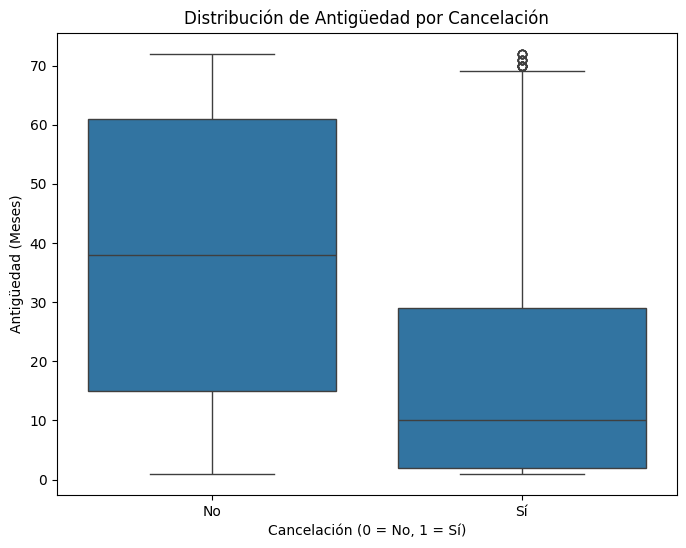


--- Antigüedad Promedio por Churn ---
Churn
0.0    37.650010
1.0    17.979133
Name: customer.tenure, dtype: float64


In [115]:
# Antiguedad vs cancelacion
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_final)
plt.title('Distribución de Antigüedad por Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Antigüedad (Meses)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

print("\n--- Antigüedad Promedio por Churn ---")
print(df_final.groupby('Churn')['customer.tenure'].mean())

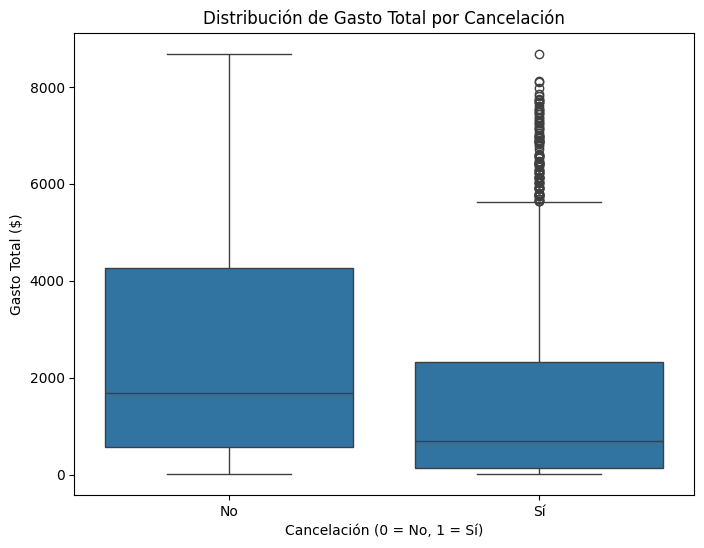


--- Gasto Total Promedio por Churn ---
Churn
0.0    2555.344141
1.0    1531.796094
Name: account.Charges.Total, dtype: float64


In [116]:
# Gasto total vs cancelacion
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_final)
plt.title('Distribución de Gasto Total por Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto Total ($)')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# 3. Imprimir el valor promedio de Gasto Total por Churn
print("\n--- Gasto Total Promedio por Churn ---")
print(df_final.groupby('Churn')['account.Charges.Total'].mean())

## Modelo predictivo ##

### Separacion de datos ###

In [124]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


### Creacipon de modelos ###

In [120]:
#Modelo de Regresión Logística

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
modelo_rl = LogisticRegression(random_state=42)
modelo_rl.fit(X_train_scaled, y_train_under)

# Evaluar el modelo
y_pred_rl = modelo_rl.predict(X_test_scaled)
print("Rendimiento del Modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_rl))

Rendimiento del Modelo de Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1033
         1.0       0.52      0.81      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407



In [128]:
#Modelo de Árbol de decision
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train_under, y_train_under)

# Evaluar el modelo
y_pred_dt = modelo_dt.predict(X_test)
print("Rendimiento del Modelo de Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))

Rendimiento del Modelo de Árbol de Decisión:
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76      1033
         1.0       0.43      0.66      0.52       374

    accuracy                           0.68      1407
   macro avg       0.64      0.67      0.64      1407
weighted avg       0.74      0.68      0.69      1407



EL mejor modelo es el de regresión y acontinuación voy analizar los resultados en una matriz de confusión.

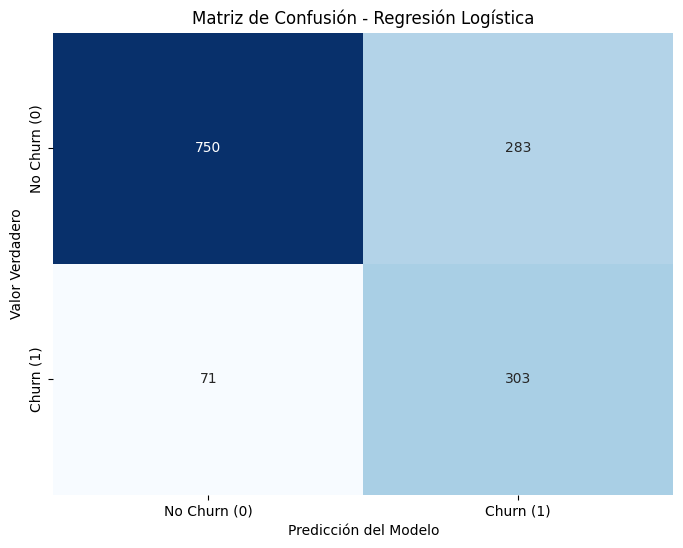

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rl)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Verdadero')
plt.show()

In [136]:
from sklearn.metrics import accuracy_score
y_pred_train = modelo_rl.predict(X_train_scaled)

precision_entrenamiento = accuracy_score(y_train_under, y_pred_train)

print(f"Precisión en los datos de entrenamiento: {precision_entrenamiento:.4f}")
print(f"Precisión en los datos de prueba: {accuracy_score(y_test, y_pred_rl):.4f}")

Precisión en los datos de entrenamiento: 0.7732
Precisión en los datos de prueba: 0.7484


## Interpretación y Conclusiones

In [137]:
feature_names = X_train_under.columns
coeficientes = modelo_rl.coef_[0]

coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes
})


coef_df['Abs_Coeficiente'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeficiente', ascending=False)

print("--- Variables más importantes para el modelo de Regresión Logística ---")
print(coef_df.drop('Abs_Coeficiente', axis=1))


--- Variables más importantes para el modelo de Regresión Logística ---
                                           Variable  Coeficiente
4                                   customer.tenure    -1.111754
15                            account.Charges.Total     0.517321
19                      internet.InternetService_No    -0.484266
18             internet.InternetService_Fiber optic     0.463933
22                        account.Contract_Two year    -0.327680
20                  account.Contract_Month-to-month     0.319626
11                             internet.StreamingTV     0.260012
16                                  Cuentas_Diarias    -0.235322
14                          account.Charges.Monthly    -0.235322
13                         account.PaperlessBilling     0.182507
12                         internet.StreamingMovies     0.161472
10                             internet.TechSupport    -0.144483
7                           internet.OnlineSecurity    -0.143663
1                 

## INFORME ##

Informe Detallado sobre Factores de Cancelación de Clientes (Churn)
1. Resumen Ejecutivo
Este informe presenta los hallazgos clave de un análisis predictivo para identificar los factores que más influyen en la cancelación de clientes (Churn). A través de la construcción y evaluación de modelos de Machine Learning, hemos identificado las variables más relevantes y proponemos estrategias de retención basadas en estos resultados.

2. Metodología de Análisis
El proceso se basó en los siguientes pasos:

Preparación de Datos: Se limpió y se preparó el conjunto de datos datos_tratados.csv, manejando valores nulos y codificando variables categóricas.

Manejo de Desbalance de Clases: Se aplicó la técnica de Undersampling al conjunto de entrenamiento, ya que demostró ser la más efectiva para mejorar la capacidad del modelo para predecir a la minoría de clientes que cancelan.

Construcción y Comparación de Modelos: Se construyeron dos modelos predictivos, uno que requería normalización (Regresión Logística) y otro que no (Árbol de Decisión).

Evaluación del Modelo: Los modelos se evaluaron en un conjunto de datos de prueba no visto, utilizando métricas clave como Exactitud, Precisión, Recall, F1-score y la Matriz de Confusión.

3. Análisis del Rendimiento de los Modelos
Después de evaluar ambos modelos, se determinó que la Regresión Logística tuvo un mejor desempeño para este problema.

Rendimiento en el Conjunto de Prueba:

Regresión Logística: Recall (clase 1) de 0.81

Árbol de Decisión: Recall (clase 1) de 0.66

Justificación: El Recall es la métrica más crítica en la predicción de Churn, ya que mide la capacidad del modelo para identificar correctamente a los clientes que realmente cancelarán. El modelo de Regresión Logística, al identificar al 81% de los clientes que se irán, es significativamente más valioso para la empresa.

4. Factores Clave que Influyen en la Cancelación (Análisis de Regresión Logística)
Basado en los coeficientes del modelo de Regresión Logística, se identificaron los siguientes factores, ordenados por su nivel de influencia en la probabilidad de cancelación:

- Antigüedad del Cliente (customer.tenure)

Impacto: Extremadamente negativo. Es el factor más influyente. Cada mes de antigüedad que un cliente tiene, reduce drásticamente su probabilidad de cancelar. Los clientes más antiguos son significativamente más leales.

- Tipo de Contrato (account.Contract_...)

Impacto: Muy fuerte. Los contratos mes a mes aumentan de forma drástica el riesgo de cancelación, mientras que los contratos a dos años son un factor muy fuerte para la retención.

- Tipo de Servicio de Internet (internet.InternetService_...)

Impacto: Fuerte. Los clientes con servicio de Fibra Óptica son mucho más propensos a cancelar que otros. Por el contrario, los clientes que no tienen servicio de internet son los menos propensos a cancelar.

- Cargos Totales (account.Charges.Total)

Impacto: Positivo. Los clientes con un gasto total más alto son más propensos a cancelar. Esto puede indicar que, una vez que el cliente alcanza un cierto umbral de gasto, comienza a buscar opciones más baratas.

5. Estrategias de Retención Basadas en los Resultados
Basado en la evidencia de los datos, se proponen las siguientes estrategias para reducir la tasa de Churn:

Estrategia 1: Enfocarse en Clientes Nuevos y Antigüedad

Acción: Implementar un programa de retención activo para los clientes durante sus primeros 6 a 12 meses. Esto puede incluir un seguimiento proactivo, ofertas especiales durante este período y programas de lealtad para incentivarlos a permanecer.

Estrategia 2: Incentivos para Contratos a Largo Plazo

Acción: Ofrecer descuentos o beneficios (como mejoras de servicio gratuitas o regalos) a los clientes con contratos mes a mes para que cambien a contratos de uno o dos años. La migración a un contrato a largo plazo es la mejor forma de asegurar la retención.

Estrategia 3: Investigar la Causa de la Cancelación de la Fibra Óptica

Acción: El alto riesgo de cancelación en los clientes con Fibra Óptica sugiere un problema subyacente. Se recomienda realizar encuestas de satisfacción o análisis de calidad del servicio para este segmento y solucionar cualquier problema de manera proactiva.

Estrategia 4: Monitoreo de Uso y Facturación

Acción: Identificar y monitorear a los clientes con un bajo gasto total en comparación con la antigüedad. Estos clientes, junto con aquellos con facturas altas, deben ser considerados como posibles candidatos a la cancelación